In [13]:
import os
import pandas as pd
# import statsmodels.api as sm 
# import sklearn
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)
pd.set_option('display.notebook_repr_html',True)

matplotlib.style.use('ggplot')

df = pd.read_csv(os.path.join('..',"data","consumer_complaints.csv.gz"))



//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df

,date_received,product,sub_product,issue,sub_issue,...,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,...,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,...,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,...,08/30/2013,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,...,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,04/14/2015,Untimely response,No,No,1329963


In [15]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [16]:
df.set_index('complaint_id')

,date_received,product,sub_product,issue,sub_issue,...,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
complaint_id,,,,,,,,,,,
511074,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,Referral,09/03/2013,Closed with explanation,Yes,Yes
511080,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,Referral,09/03/2013,Closed with explanation,Yes,Yes
510473,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,...,Postal mail,09/18/2013,Closed with explanation,Yes,No
510326,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,...,Email,08/30/2013,Closed with explanation,Yes,Yes
511067,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,...,Web,08/30/2013,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
919529,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,Referral,07/07/2014,Closed with explanation,Yes,No
918447,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,Referral,07/23/2014,Closed with explanation,No,No
114550,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,...,Phone,11/18/2013,Closed with explanation,Yes,No


In [17]:
df_product = pd.get_dummies(df['product'])

In [18]:
df_product

,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,...,Mortgage,Other financial service,Payday loan,Prepaid card,Student loan
0,0,0,0,0,0,...,1,0,0,0,0
1,0,0,0,0,0,...,1,0,0,0,0
2,0,0,0,1,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,1
4,0,0,0,0,1,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
555952,0,0,0,0,0,...,1,0,0,0,0
555953,0,0,0,0,0,...,1,0,0,0,0
555954,0,0,0,0,0,...,1,0,0,0,0
555955,0,0,0,0,1,...,0,0,0,0,0


In [19]:
df_product = pd.get_dummies(df, columns=['product'])

In [20]:
df_product

,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
0,08/30/2013,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,...,1,0,0,0,0
1,08/30/2013,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,...,1,0,0,0,0
2,08/30/2013,NaN,Incorrect information on credit report,Account status,NaN,...,0,0,0,0,0
3,08/30/2013,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,...,0,0,0,0,1
4,08/30/2013,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,...,1,0,0,0,0
555953,07/01/2014,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,...,1,0,0,0,0
555954,07/10/2012,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,...,1,0,0,0,0
555955,04/14/2015,I do not know,Communication tactics,Frequent or repeated calls,NaN,...,0,0,0,0,0


In [21]:
df.head()

,date_received,product,sub_product,issue,sub_issue,...,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,...,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,...,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,...,08/30/2013,Closed with explanation,Yes,Yes,511067


In [22]:
df_with_expanded_product = pd.get_dummies(df, columns=['product'])

In [23]:
df_with_expanded_product.head()

,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
0,08/30/2013,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,...,1,0,0,0,0
1,08/30/2013,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,...,1,0,0,0,0
2,08/30/2013,NaN,Incorrect information on credit report,Account status,NaN,...,0,0,0,0,0
3,08/30/2013,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,...,0,0,0,0,1
4,08/30/2013,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,...,0,0,0,0,0


## How many mortgages get complained about per state

In [24]:
df_mortgage_counts_state = df_with_expanded_product.groupby('state').sum()

In [25]:
df_mortgage_counts_state

,complaint_id,product_Bank account or service,product_Consumer Loan,product_Credit card,product_Credit reporting,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
state,,,,,,,,,,,
AA,7534741,1.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,2.0
AE,214480925,21.0,15.0,24.0,47.0,...,68.0,0.0,0.0,1.0,10.0
AK,587575953,66.0,19.0,98.0,120.0,...,157.0,0.0,5.0,3.0,17.0
AL,5759014037,600.0,373.0,552.0,1096.0,...,1395.0,8.0,79.0,27.0,164.0
AP,160372554,7.0,9.0,20.0,28.0,...,39.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
VT,853127304,128.0,43.0,156.0,113.0,...,302.0,0.0,1.0,5.0,55.0
WA,11191050471,1094.0,275.0,1284.0,1829.0,...,4315.0,11.0,48.0,50.0,312.0
WI,5754954013,572.0,266.0,993.0,798.0,...,1955.0,7.0,75.0,45.0,209.0


In [26]:
df_mortgage_by_counts_state = df_with_expanded_product.groupby(['state']).sum()

In [27]:
df_mortgage_by_counts_state

,complaint_id,product_Bank account or service,product_Consumer Loan,product_Credit card,product_Credit reporting,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
state,,,,,,,,,,,
AA,7534741,1.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,2.0
AE,214480925,21.0,15.0,24.0,47.0,...,68.0,0.0,0.0,1.0,10.0
AK,587575953,66.0,19.0,98.0,120.0,...,157.0,0.0,5.0,3.0,17.0
AL,5759014037,600.0,373.0,552.0,1096.0,...,1395.0,8.0,79.0,27.0,164.0
AP,160372554,7.0,9.0,20.0,28.0,...,39.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
VT,853127304,128.0,43.0,156.0,113.0,...,302.0,0.0,1.0,5.0,55.0
WA,11191050471,1094.0,275.0,1284.0,1829.0,...,4315.0,11.0,48.0,50.0,312.0
WI,5754954013,572.0,266.0,993.0,798.0,...,1955.0,7.0,75.0,45.0,209.0


In [32]:
df_mortgage_by_counts_state = df_with_expanded_product.groupby(['state'], squeeze = True).sum()

In [36]:
df_mortgage_by_counts_state

,complaint_id,product_Bank account or service,product_Consumer Loan,product_Credit card,product_Credit reporting,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
state,,,,,,,,,,,
AA,7534741,1.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,2.0
AE,214480925,21.0,15.0,24.0,47.0,...,68.0,0.0,0.0,1.0,10.0
AK,587575953,66.0,19.0,98.0,120.0,...,157.0,0.0,5.0,3.0,17.0
AL,5759014037,600.0,373.0,552.0,1096.0,...,1395.0,8.0,79.0,27.0,164.0
AP,160372554,7.0,9.0,20.0,28.0,...,39.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
VT,853127304,128.0,43.0,156.0,113.0,...,302.0,0.0,1.0,5.0,55.0
WA,11191050471,1094.0,275.0,1284.0,1829.0,...,4315.0,11.0,48.0,50.0,312.0
WI,5754954013,572.0,266.0,993.0,798.0,...,1955.0,7.0,75.0,45.0,209.0


In [40]:
%matplotlib notebook

<IPython.core.display.Javascript object>


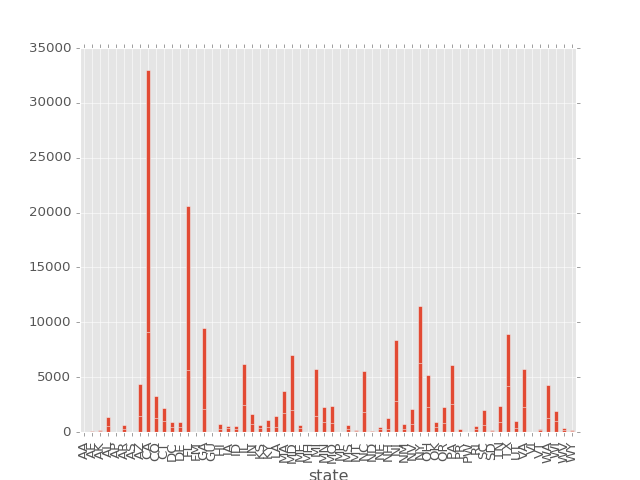

In [41]:
df_mortgage_by_counts_state['product_Mortgage'].plot(kind = "bar")

In [ ]:
type(df_mortgage_counts_by_state['product_Mortgage'])

In [ ]:
df_mortgage_counts_by_state['product_Mortgage'].to_frame()

In [34]:
df_counts_by_state = df_with_expanded_product.groupby(['state']).count()

In [ ]:
df_counts_by_state

<IPython.core.display.Javascript object>


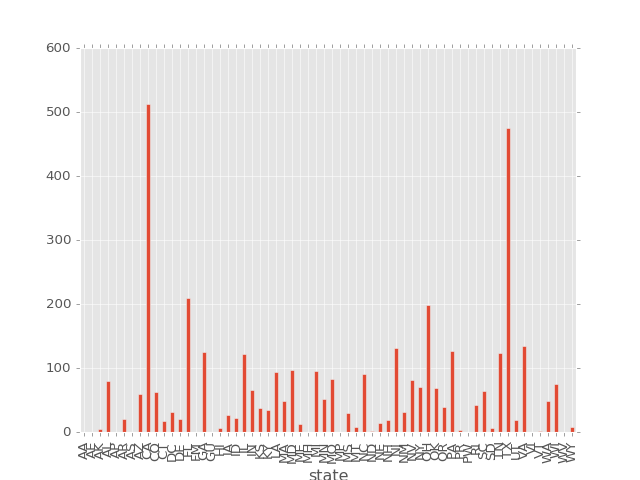

In [38]:
df_mortgage_by_counts_state['product_Payday loan'].plot(kind = "bar")

In [45]:
df_mortgage_by_counts_state['product_Credit card'].plot(kind = "bar")